In [1]:
import geopandas
import tifffile as tiff
import cv2
import matplotlib; matplotlib.rcParams['figure.dpi']=100
import matplotlib.pyplot as plt
import pickle
import numpy as np

In [2]:
with open("./data/match_dict.pkl", "rb") as file:
    match_dict = pickle.load(file)


In [3]:
match_dict

{'_SS12251_140745': '011320_002_N_HR',
 '_SS12251_140908': '011320_002_T_HR',
 '_SS12251_141012': '012320_005_N_TNBC',
 '_SS12251_141106': '012320_005_T_TNBC',
 '_SS12251_141217': '050420_001_N_TNBC',
 '_SS12251_141332': '050420_001_T_TNBC',
 '_SS12251_141451': None,
 '_SS12251_141611': '102720_003_T_TNBC',
 '_SS12251_141731': '011620_002_N_HR',
 '_SS12251_141847': None,
 '_SS12251_142001': '012419_002_N_HER2',
 '_SS12251_142106': '012419_002_T_HER2',
 '_SS12251_142240': '092619_007_N_HER2',
 '_SS12251_142406': '092619_007_T_HER2',
 '_SS12251_142537': '012020_006_N_HR',
 '_SS12251_142720': '012020_006_T_HR'}

In [4]:
file_name = '_SS12251_140745'

gp = geopandas.read_file("./data/_SS12251_140745.geojson")

im_large = tiff.imread("./data/_SS12251_140745.svs")
im_small = cv2.resize(im_large, None, fx=1/15, fy=1/15)

gp['annot']=gp['classification'].map(lambda x: x.get("name","none"))

gp2=gp.copy()
gp2['geometry']=gp2['geometry'].scale(1/15,1/15,origin=(0,0))
gp2['coords'] = gp2['geometry'].apply(lambda x: x.representative_point().coords[:])
gp2['coords'] = [coords[0] for coords in gp2['coords']]

_SS12251_140745 011320_002_N_HR


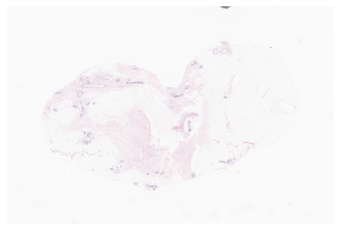

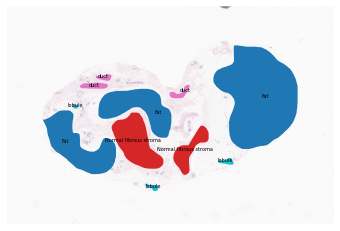

In [5]:
print(file_name, match_dict[file_name])
plt.imshow(im_small)
plt.axis("off")
plt.show()

gp2.plot('annot', aspect=1)
plt.imshow(im_small)
plt.axis("off")
for idx, row in gp2.iterrows():
    plt.annotate(text=row['annot'], xy=row['coords'],
                 horizontalalignment='center',fontsize=5,rotation=0)

In [6]:
with open("./data/011320_002_N_HR_dict.pkl", "rb") as input_file:
    data = pickle.load(input_file)
    

In [7]:
data['metals'].keys()

dict_keys(['Ca44', 'Cu63', 'Fe56', 'Mg24', 'Mn55', 'Na23'])

/Users/luyunrui/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/Users/luyunrui/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


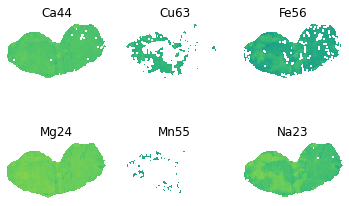

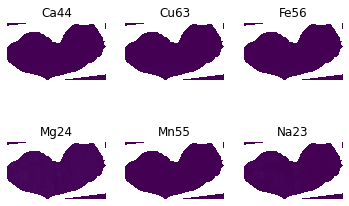

In [8]:
fig, axs = plt.subplots(2, 3)
metal_c = 0
for x in range(2):
    for y in range(3):
        axs[x, y].imshow(np.log(data['metals'][list(data['metals'].keys())[metal_c]])+10)
        axs[x, y].set_title(str(list(data['metals'].keys())[metal_c]))
        axs[x, y].axis('off')
        metal_c += 1
plt.show()

fig, axs = plt.subplots(2, 3)
metal_c = 0
for x in range(2):
    for y in range(3):
        axs[x, y].imshow(data['metals'][list(data['metals'].keys())[metal_c]])
        axs[x, y].set_title(str(list(data['metals'].keys())[metal_c]))
        axs[x, y].axis('off')
        metal_c += 1
plt.show()